In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


In [2]:
df1 = pd.read_excel('Car sales data.xlsx')

df2 = df1[df1['Year'] > 1969] # keeping 50 years of data

#Sorting the data

df = df2.groupby(by=['Make','Year']).sum().groupby(level=[0]).cumsum() #gives cummulative sum 

df.reset_index(inplace = True)

df['Rank'] = df.Make.rank(method='dense').astype(int) # Adding dense rank on Make 

current_year = 2019
dff = (df[df['Year'].eq(current_year)].sort_values(by='Sales', ascending=True).head(10)) #top 10 Sales 

dff


,Make,Year,Sales,Rank
469,Genesis,2019,59105,18
391,Ferrari,2019,77020,14
1354,Smart,2019,98800,54
69,Alfa Romeo,2019,146106,2
1247,Range Rover,2019,272768,49
1444,Tesla,2019,523771,58
400,Fiat,2019,560596,15
1055,Mini,2019,847284,40
673,Jaguar,2019,951738,24
1205,Porsche,2019,984915,47


<BarContainer object of 10 artists>

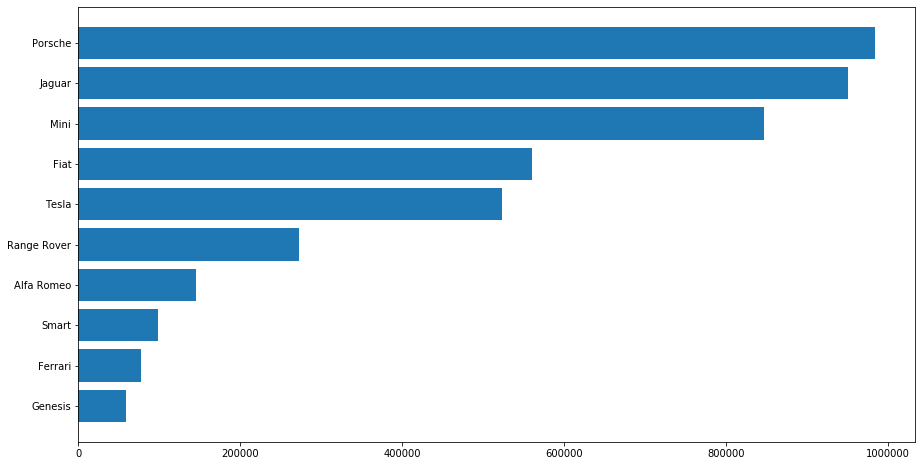

In [3]:
#basic plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Make'], dff['Sales'])

In [27]:
#Adding colours to specific bars
Cars = list(df.Rank.unique())

Colours = ['#45BB95','#45BB48','#fc7303','#bed4d1','#BB7D45','#BB4548','#fc036b','#B845BB','#BB4583','#4548BB','#8345BB','#BBBB45','#217420','#facaf3',
           '#B76989','#B79769','#E0D7C9','#6EF10D','#03b6fc','#d0d0d6','#85ffef','#fdff85','#ed9c8a','#8c8aed','#b0d67a','#eba50e','#36b36e']

colors = dict(zip(Cars,Colours*3))

group_lk = df.set_index('Make')['Rank'].to_dict()


Text(1, 0.4, '2019')

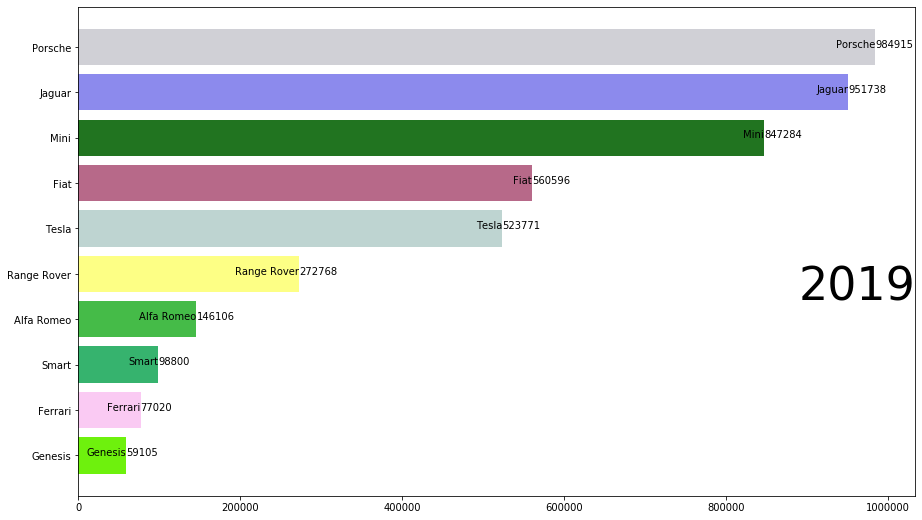

In [28]:
fig, ax = plt.subplots(figsize=(15, 9))

#adding brand names and sales on bars

ax.barh(dff['Make'], dff['Sales'], color= [colors[group_lk[x]] for x in dff['Make']])

for i, (value, name) in enumerate(zip(dff['Sales'], dff['Make'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
    
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

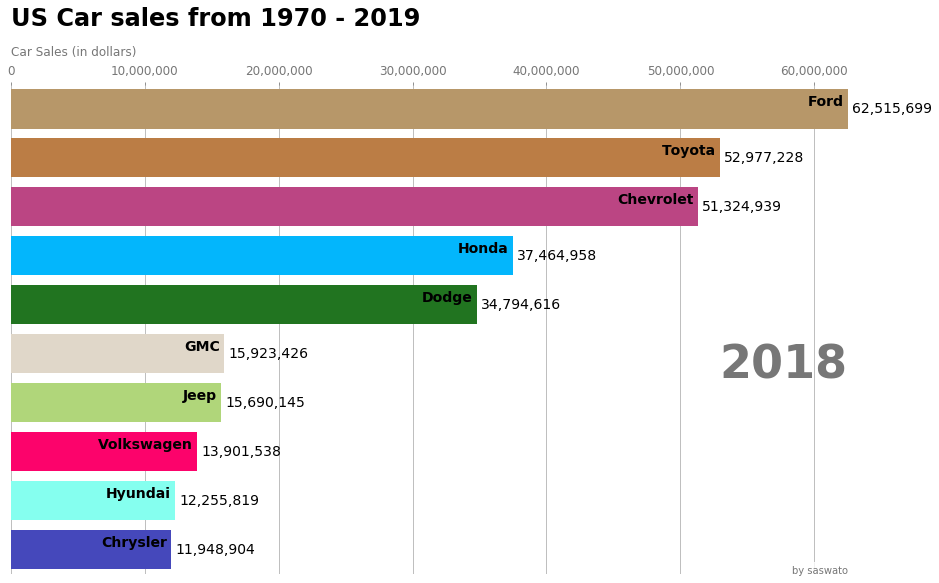

In [29]:
fig, ax = plt.subplots(figsize=(15, 9))
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Sales', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Make'], dff['Sales'], color= [colors[group_lk[x]] for x in dff['Make']])
    dx = dff['Sales'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Sales'], dff['Make'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    #enhancing visual effects by changing styles of different axis objects
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Car Sales (in dollars)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'US Car sales from 1970 - 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by saswato', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

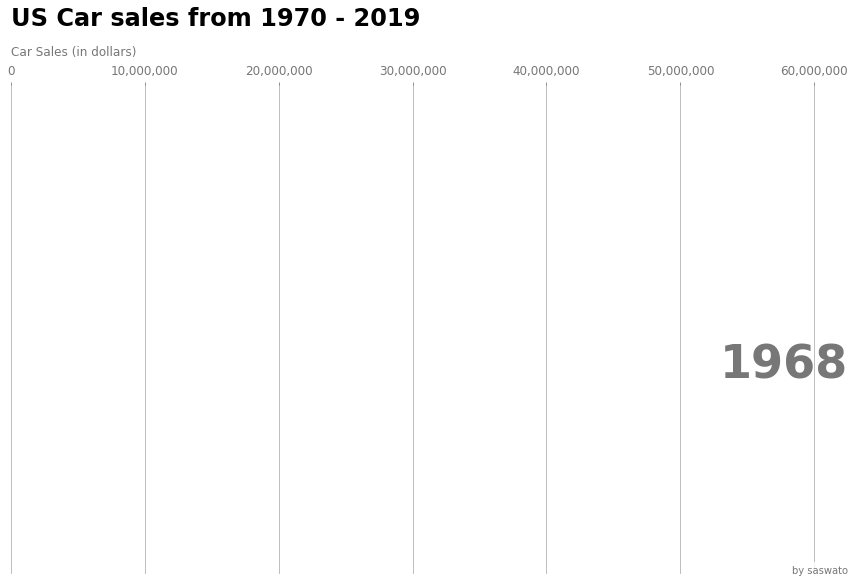

In [40]:
#to create a looping gif use below function

from matplotlib.animation import PillowWriter    

class LoopingPillowWriter(PillowWriter):
    def finish(self):
        self._frames[0].save(
            self._outfile, save_all=True, append_images=self._frames[1:],
            duration=int(1000 / self.fps), loop=0)

fig, ax = plt.subplots(figsize=(15, 9))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019), interval = 500)
#HTML(animator.to_jshtml()) 


animator.save('demo.gif', writer=LoopingPillowWriter(fps=10))

In [ ]:
##To directly view the output , use below code

#fig, ax = plt.subplots(figsize=(15, 9))
#animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019), interval = 500)
#HTML(animator.to_jshtml()) 